# Decode 9.1 (Python Hackathon)


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

### Read the Transaction Data

In [2]:
trans=pd.read_csv('F:\Data Science\Python Hackathon\Python_hackathon_dataset\Transactions.csv')

In [3]:
trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [4]:
trans.isnull()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
23048,False,False,False,False,False,False,False,False,False,False
23049,False,False,False,False,False,False,False,False,False,False
23050,False,False,False,False,False,False,False,False,False,False
23051,False,False,False,False,False,False,False,False,False,False


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [6]:
trans.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [7]:
trans.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

### There are no null values in the data

In [8]:
trans = trans[(trans['Qty'] >= 0) & (trans['Rate'] >= 0 )]

In [9]:
trans.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,2.087600e+04,20876.000000,20876.000000,20876.000000,20876.000000,20876.000000,20876.000000,20876.000000
mean,5.000701e+10,271027.141981,6.156639,3.761496,3.003497,785.927764,247.861232,2608.444389
std,2.896115e+10,2433.338935,3.722363,1.675859,1.420479,415.586498,186.644248,1964.208517
min,3.268991e+06,266783.000000,1.000000,1.000000,1.000000,70.000000,7.350000,77.350000
25%,2.487089e+10,268938.000000,3.000000,2.000000,2.000000,426.000000,97.938750,1030.688750
50%,5.007968e+10,271004.000000,5.000000,4.000000,3.000000,788.000000,198.555000,2089.555000
75%,7.512409e+10,273122.250000,10.000000,5.000000,4.000000,1148.000000,363.510000,3825.510000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


###  The negative values in the Quantity and rate is removed above.


##    <font color='Blue'>1.What are the Total Number of Transactions  from 2011 to 2014?</font> 

In [10]:
print("Total Number of Transactions:",trans['transaction_id'].nunique())

Total Number of Transactions: 20876


In [11]:
trans['tran_date']=pd.to_datetime(trans['tran_date'])

In [12]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20876 entries, 10 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20876 non-null  int64         
 1   cust_id           20876 non-null  int64         
 2   tran_date         20876 non-null  datetime64[ns]
 3   prod_subcat_code  20876 non-null  int64         
 4   prod_cat_code     20876 non-null  int64         
 5   Qty               20876 non-null  int64         
 6   Rate              20876 non-null  int64         
 7   Tax               20876 non-null  float64       
 8   total_amt         20876 non-null  float64       
 9   Store_type        20876 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.8+ MB


In [13]:
#Year
trans['Year']=trans['tran_date'].dt.year
trans['Month']=trans['tran_date'].dt.month

In [14]:
trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Year,Month
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,2014,2
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,2014,2
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,2014,2
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,2014,2
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,2011,1
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,2011,1
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,2011,1
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,2011,1


In [15]:
order_mon = trans.groupby(by=['Month'], as_index=False)['transaction_id'].count()

## <font color='Blue'>2. What are the orders done  monthly?</font>

In [16]:
order_mon

,Month,transaction_id
0,1,1869
1,2,1687
2,3,1785
3,4,1653
4,5,1677
5,6,1666
6,7,1746
7,8,1729
8,9,1789
9,10,1828


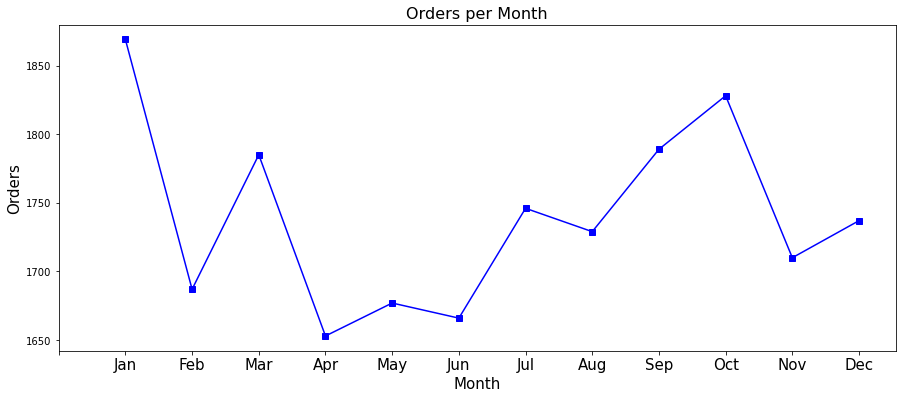

In [17]:
df1=trans.groupby(by='Month')['transaction_id' ].count().plot(kind = 'line', color='blue', figsize=(15,6), marker='s')
mon = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mon_l =list(range(len(mon)))
plt.xticks (mon_l,mon, fontsize=15, rotation='horizontal')
df1.set_xlabel("Month", fontsize=15)
df1.set_ylabel("Orders", fontsize=15)
plt.title('Orders per Month', fontsize=16)
plt.show()

In [18]:
trans[['cust_id','transaction_id','Store_type','Year']].nunique()

cust_id            5506
transaction_id    20876
Store_type            4
Year                  4
dtype: int64

## <font color ='blue'>3. What is the minimum and maximum order quantity  for a product?</font>

In [126]:
trans.aggregate({"Qty":['sum', 'min','max']}) 

,Qty
sum,62701
min,1
max,5


## <font color='blue'>4. Find the minimum and maximum transactions done?</font>

In [20]:
trans.aggregate({"total_amt":['sum', 'min','max']})

,total_amt
sum,54453885.07
min,77.35
max,8287.50


## <font color='blue'>5.What is the total sales done per year??</font>

Text(0.5, 1.0, 'Transaction Value by Year')

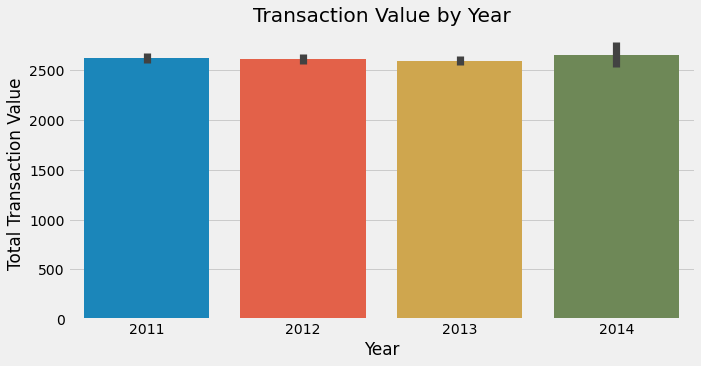

In [98]:
from numpy import mean
# Trend by Year:
plt.figure(figsize=(10,5))

trend_year=pd.DataFrame(trans.groupby('Year')['total_amt'].sum().sort_values(ascending=False)).reset_index()
ax=sns.barplot(x='Year',y='total_amt',data=trans,estimator=mean)
#ax.ticklabel_format()
ax.set_xlabel('Year')
ax.set_ylabel('Total Transaction Value')
ax.set_title('Transaction Value by Year')

In [99]:
trans.groupby('Year')['total_amt'].mean()

Year
2011    2615.574483
2012    2611.852585
2013    2592.291036
2014    2651.536016
Name: total_amt, dtype: float64

## <font color='blue'>6. Find the number of customers visiting store?</font>

Text(0, 0.5, 'Customer Count')

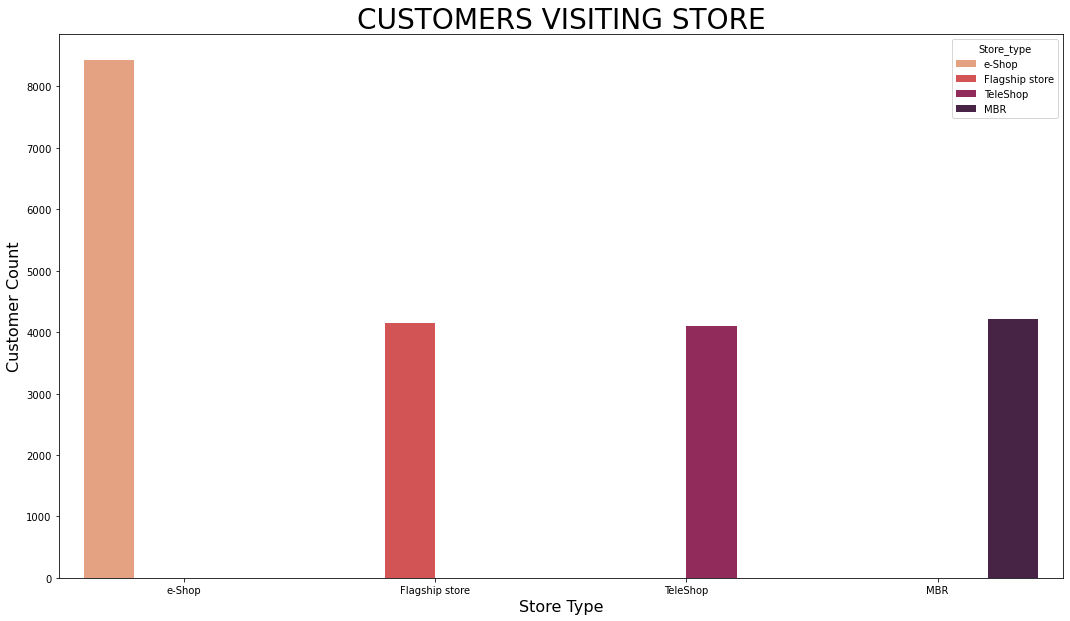

In [23]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x = "Store_type", hue = "Store_type", data = trans, palette= "rocket_r")
ax.set_title(label = "CUSTOMERS VISITING STORE", fontsize = 28)
ax.set_xlabel(xlabel = "Store Type", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)

In [24]:
trans.Store_type.value_counts()

e-Shop            8429
MBR               4210
Flagship store    4145
TeleShop          4092
Name: Store_type, dtype: int64

## Customer Dataset

In [25]:
Cust=pd.read_csv('F:\Data Science\Python Hackathon\Python_hackathon_dataset\Customer.csv')

In [26]:
Cust

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


## <font color='blue'>7.Find the number of Stores ?  </font>

In [27]:
Cust[['customer_Id','Gender','city_code']].nunique()

customer_Id    5647
Gender            2
city_code        10
dtype: int64

In [28]:
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [29]:
Cust.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [30]:
Cust['Gender'].replace('', np.nan, inplace=True)

In [31]:
Cust['city_code'].replace('', np.nan, inplace=True)

In [32]:
Cust.dropna(subset=['Gender'], inplace=True)

In [33]:
Cust.dropna(subset=['city_code'], inplace=True)

In [34]:
Cust.isnull().sum()

customer_Id    0
DOB            0
Gender         0
city_code      0
dtype: int64

## <font color='blue'>8.Which gender - males or females prefer more for store ? </font>

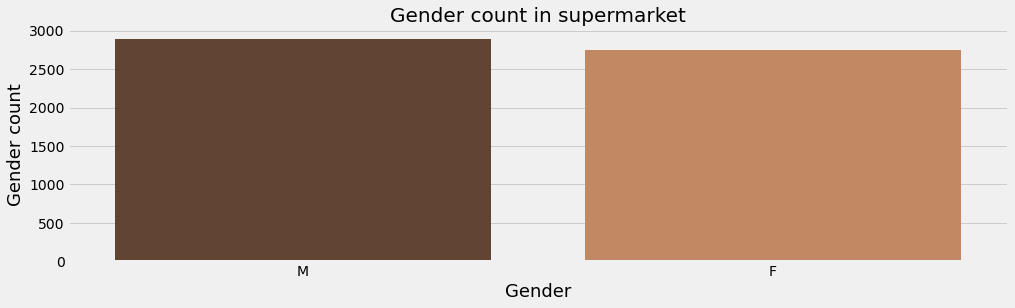

In [136]:
plt.figure(figsize=(15,4))
plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=Cust , palette = 'copper')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show()

### Here we can see that the number of males and females entering the store is almost equal. But the visulaization looks suspicious. Let's check numeric data.

In [36]:
Cust.Gender.value_counts()

M    2891
F    2752
Name: Gender, dtype: int64

## <font color='blue'>9.What percent of gender do more shopping?</font>

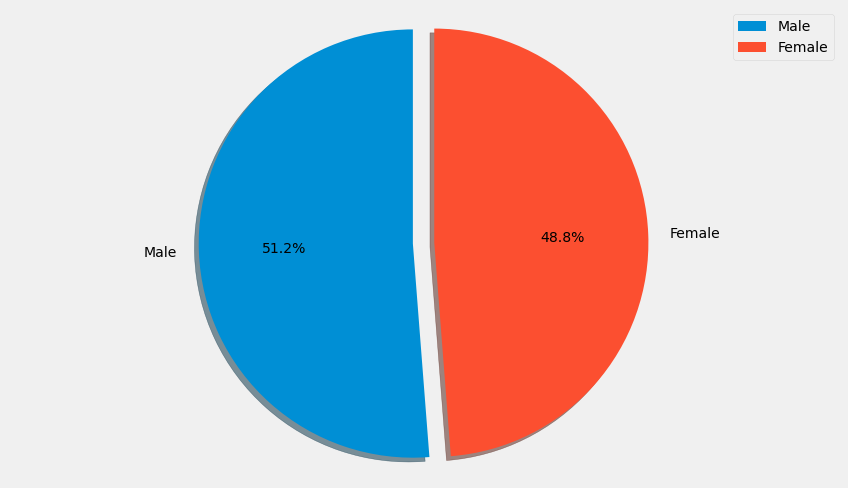

In [37]:
# Pie Graph
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(Cust['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

### As the Data type of DOB (Date of birth )is object,So we need to change the data type into DataTime.


In [114]:
Cust['DOB']=pd.to_datetime(Cust['DOB'])

In [115]:
Cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5643 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5643 non-null   int64         
 1   DOB          5643 non-null   datetime64[ns]
 2   Gender       5643 non-null   object        
 3   city_code    5643 non-null   float64       
 4   DOB_Year     5643 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 424.5+ KB


In [116]:
Cust['DOB_Year']=Cust['DOB'].dt.year

In [117]:
Cust.head()

,customer_Id,DOB,Gender,city_code,DOB_Year
0,268408,1970-02-01,M,4.0,1970
1,269696,1970-07-01,F,8.0,1970
2,268159,1970-08-01,F,8.0,1970
3,270181,1970-10-01,F,2.0,1970
4,268073,1970-11-01,M,1.0,1970


## <font color='blue'>10.Show the distribution of Customers according to age and gender.</font>

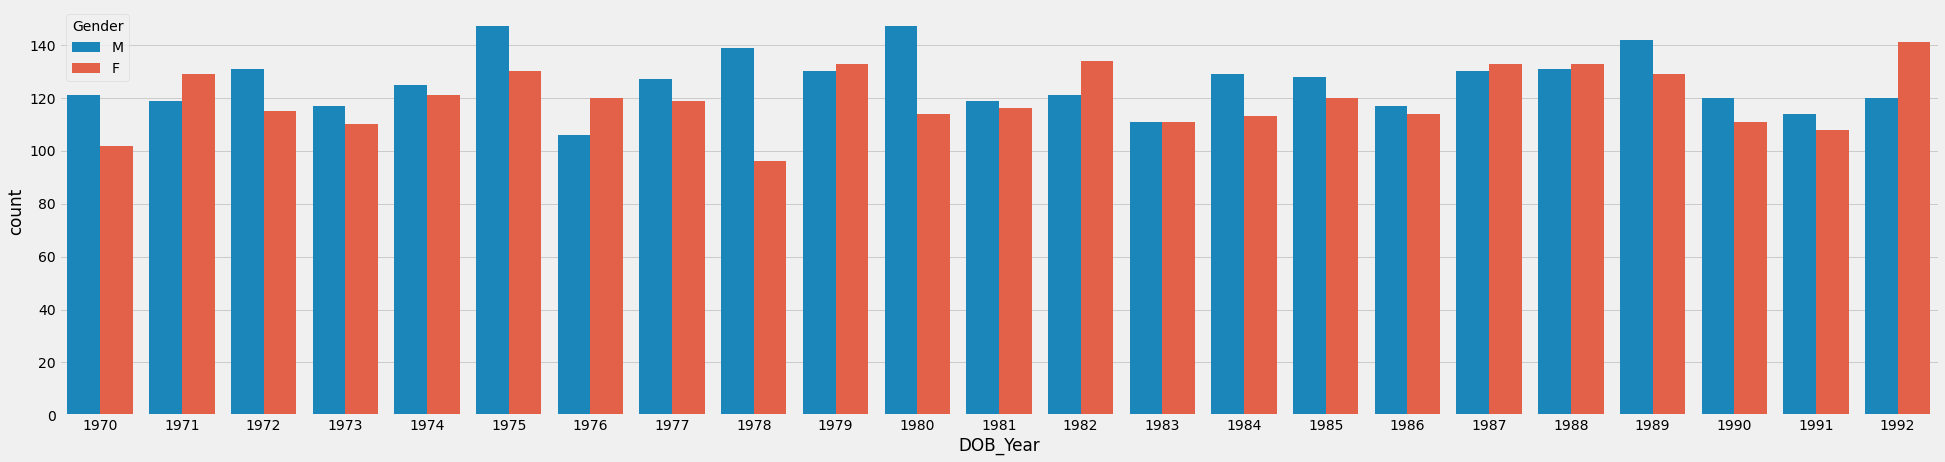

In [42]:
fig1, ax1 = plt.subplots(figsize=(30,7))
sns.countplot(Cust['DOB_Year'],hue=Cust['Gender'])

In [43]:
prod=pd.read_csv('F:\Data Science\Python Hackathon\Python_hackathon_dataset\prod_cat_info.csv')

In [44]:
Data=pd.merge(prod,trans,on='prod_cat_code')

In [45]:
Data

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type,Year,Month
0,1,Clothing,4,Mens,44783317894,269452,2014-02-20,3,3,825,259.875,2734.875,TeleShop,2014,2
1,1,Clothing,4,Mens,80712190438,270351,2014-02-20,1,5,772,405.300,4265.300,e-Shop,2014,2
2,1,Clothing,4,Mens,28396777609,269101,2014-02-19,4,4,1386,582.120,6126.120,TeleShop,2014,2
3,1,Clothing,4,Mens,58956348529,272484,2014-02-18,4,4,1443,606.060,6378.060,TeleShop,2014,2
4,1,Clothing,4,Mens,83498320600,273359,2014-02-18,4,4,861,361.620,3805.620,e-Shop,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,6,Home and kitchen,12,Tools,69487840177,269659,2011-01-26,12,2,378,79.380,835.380,MBR,2011,1
89995,6,Home and kitchen,12,Tools,78766424618,267618,2011-01-26,11,3,1128,355.320,3739.320,Flagship store,2011,1
89996,6,Home and kitchen,12,Tools,39737254095,272286,2011-01-25,2,5,71,37.275,392.275,e-Shop,2011,1
89997,6,Home and kitchen,12,Tools,40893803228,272049,2011-01-25,11,3,1077,339.255,3570.255,e-Shop,2011,1


In [46]:
Data.groupby(by='prod_cat')['cust_id'].count().sort_values()

prod_cat
Bags                 3578
Clothing             8028
Footwear             8124
Home and kitchen    14928
Electronics         22425
Books               32916
Name: cust_id, dtype: int64

## <font color='blue'>11.What percent of products are sold in market?</font>

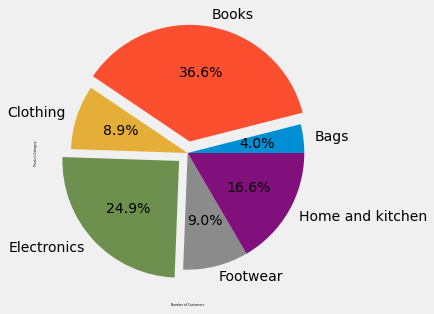

In [47]:
explode = (0,0.1,0,0.1,0,0)
j=Data.groupby(by='prod_cat')['cust_id'].count().plot(kind ='pie',explode=explode, figsize=(20,5),autopct='%1.1f%%')
j.set_xlabel('Number of Customers', fontsize=3)
j.set_ylabel('Product Category', fontsize=3)
plt.show()

## <font color='blue'>12. Which store has the highest sales?</font>

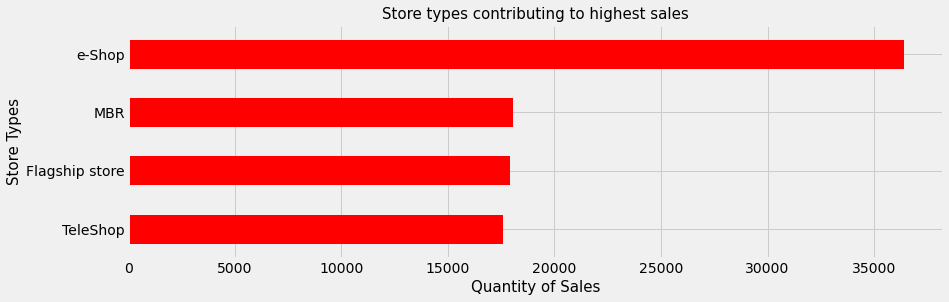

In [90]:
a=Data.groupby (by ='Store_type')['cust_id'].count().sort_values().plot(kind='barh', color='red', figsize=(13,4))
plt.title('Store types contributing to highest sales', fontsize=15)
a.set_xlabel('Quantity of Sales', fontsize=15)
a.set_ylabel('Store Types', fontsize=15)
plt.show()

## <font color='blue'>13.Name the product category in which maximum tax is added ?</font>

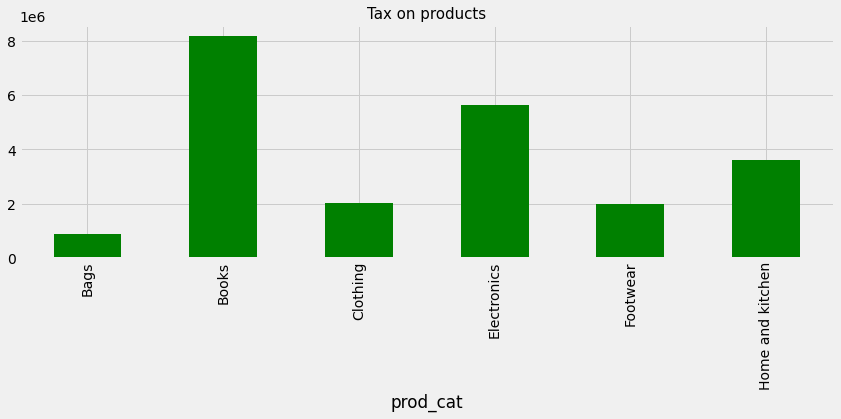

In [120]:
b=Data.groupby (by ='prod_cat')['Tax'].sum().plot(kind='bar', color='green', figsize=(13,4))
plt.title('Tax on products', fontsize=15)
a.set_xlabel('Products', fontsize=15)
a.set_ylabel('Tax', fontsize=15)
plt.show()


## <font color='blue'>14.Which product is maximum and minimum sold?</font>

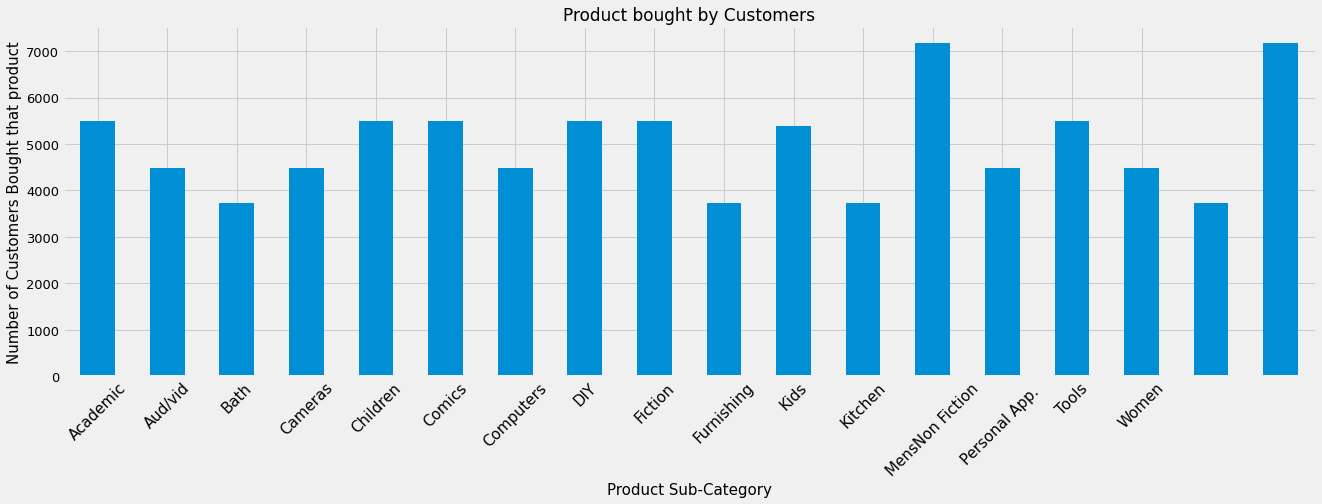

In [91]:
s=Data.groupby(by='prod_subcat')['transaction_id'].count().plot(kind ='bar', figsize=(20,6))
sub_cat=['Academic', 'Aud/vid', 'Bath', 'Cameras', 'Children', 'Comics', 'Computers', 'DIY', 'Fiction', 'Furnishing', 'Kids', 'Kitchen', 'Mens'
'Non Fiction', 'Personal App. ', 'Tools', 'Women']
xi = list(range(len(sub_cat)))
s.set_xlabel("Product Sub-Category", fontsize=15)
s.set_ylabel("Number of Customers Bought that product", fontsize=15)
plt. xticks (xi, sub_cat, fontsize=15, rotation = 45)
plt.yticks (fontsize=13)
plt.title("Product bought by Customers", fontsize=17)
plt.show()